In [1]:
import pandas as pd
csv_file_name = "JAK1_v2.csv"
sample_data = pd.read_csv(csv_file_name,sep=",")

X_data = sample_data.iloc[:,1:-1]
y_data = sample_data.iloc[:,-1:]

In [2]:
X_data.shape

(21, 1444)

In [3]:
y_data.shape

(21, 1)

In [4]:
import pyqsar

In [5]:
from pyqsar import data_tools as dt

In [6]:
X_data.shape

(21, 1444)

In [7]:
X_data = dt.rm_empty_feature(X_data)

In [8]:
X_data.shape

(21, 984)

In [9]:
X_data = dt.rmNaN(X_data)

In [10]:
X_data.shape

(21, 984)

In [11]:
%matplotlib inline
dt.ScatterMatrix(X_data)

U2VsZWN0TXVsdGlwbGUoZGVzY3JpcHRpb249dSdTZWxlY3RlZCBGZWF0dXJlczonLCBvcHRpb25zPSgnQUxvZ1AnLCAnQUxvZ3AyJywgJ0FNUicsICdhcG9sJywgJ25BdG9tJywgJ25IZWF2eUHigKY=


C:\Users\CBBL\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Button(description=u'Get scatter matrix', style=ButtonStyle())

<pyqsar.data_tools.ScatterMatrix instance at 0x000000000F645F08>

In [12]:
from sklearn.preprocessing import MinMaxScaler
header = list(X_data.columns.values)
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data = pd.DataFrame(X_data_scaled, columns=header)

In [14]:
X_data.head()

,ALogP,ALogp2,AMR,apol,nAtom,nHeavyAtom,nH,nC,nN,nO,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0.034873,0.952379,0.009230,0.461636,0.5,0.333333,0.6,0.666667,0.0,0.0,...,0.106564,0.442353,1.000000,0.045751,0.024396,0.149783,0.207977,0.428571,1.000000,0.545455
1,0.535950,0.369846,0.648332,0.670759,0.5,0.666667,0.4,0.666667,0.0,0.0,...,0.810461,0.709257,0.795990,0.909839,0.024396,0.150110,0.549858,0.714286,0.686880,0.818182
2,0.535950,0.369846,0.648332,0.670759,0.5,0.666667,0.4,0.666667,0.0,0.0,...,0.810461,0.709333,0.796456,0.908088,0.024396,0.150250,0.582621,0.714286,0.686880,0.818182
3,0.000000,1.000000,0.841829,1.000000,1.0,1.000000,1.0,1.000000,0.0,1.0,...,0.149297,1.000000,0.745661,1.000000,1.000000,0.151613,0.934473,1.000000,0.372012,1.000000
4,0.000000,1.000000,0.841829,1.000000,1.0,1.000000,1.0,1.000000,0.0,1.0,...,0.149297,0.999912,0.745143,0.998503,0.998631,0.151452,1.000000,1.000000,0.372012,1.000000


In [16]:
from pyqsar import clustering as cl
cl.cophenetic(X_data)

average linkage cophenet: 0.7408095784804193
complete linkage cophenet: 0.6912513514263353
single linkage cophenet: 0.1902375254159036


In [17]:
clust = cl.FeatureCluster(X_data, 'average', 3)
clust_info = clust.set_cluster()


Cluster 1 ['Sp', 'Sv', 'ATS4e', 'ATS4i', 'ATS4v', 'ATS4p', 'apol', 'ATS2e', 'HybRatio'] 
Cluster 2 ['ATS6p'] 
Cluster 3 ['ATS0v', 'ETA_Eta_R_L', 'SP-1', 'WTPT-1', 'ETA_Beta_s', 'VAdjMat', 'WPOL', 'nHeavyAtom', 'nC'] 
Cluster 4 ['SpMax8_Bhv'] 
Cluster 5 ['VR3_Dt'] 
Cluster 6 ['ETA_Eta'] 
Cluster 7 ['MLogP'] 
Cluster 8 ['piPC4', 'piPC3', 'piPC1', 'piPC7', 'piPC6', 'piPC5', 'piPC2'] 
Cluster 9 ['SP-2', 'SPC-4'] 
Cluster 10 ['MLFER_L'] 
Cluster 11 ['SpMax5_Bhi', 'SpMax5_Bhe'] 
Cluster 12 ['SRW2', 'SP-3', 'nBonds', 'ATS1v', 'ATS3i', 'nBondsS3', 'ATS3e', 'TWC', 'ATS1p', 'ETA_Eta_L'] 
Cluster 13 ['VP-1'] 
Cluster 14 ['SpMax8_Bhp', 'ATS7p', 'ATS7v', 'ATS8p', 'ATS8v', 'ATS6v'] 
Cluster 15 ['ATS0p', 'ATS5m'] 
Cluster 16 ['ETA_Alpha'] 
Cluster 17 ['MATS4i', 'ATSC4i', 'AATSC4i'] 
Cluster 18 ['VE2_DzZ', 'VE2_Dzm', 'VE3_DzZ', 'VE3_Dzm'] 
Cluster 19 ['VE2_Dzi', 'VE2_Dze', 'VE3_Dzi', 'VE3_Dze'] 
Cluster 20 ['GATS3c'] 
Cluster 21 ['VR3_Dzi'] 
Cluster 22 ['AATSC6p', 'MATS6p', 'ATSC6p'] 
Cluster 23 ['GA

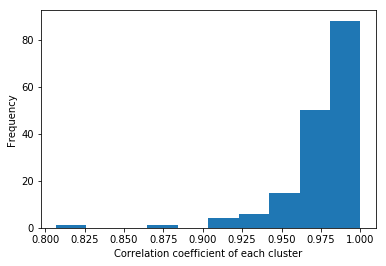

In [18]:
clust.cluster_dist()

In [19]:
from pyqsar import feature_selection_single as fss
select = fss.selection(X_data, y_data,
                       clust_info,
                       model='regression',
                       learning=10000,
                       bank=200,
                       component=4)

Start time :  11:15:06
Regression
1000 => 11:19:51 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
2000 => 11:24:45 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
3000 => 11:29:42 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
4000 => 11:34:31 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
5000 => 11:39:19 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
6000 => 11:44:21 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
7000 => 11:49:08 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
8000 => 11:53:53 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
9000 => 11:58:31 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
10000 => 12:03:22 [0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
[0.9304705462816968, ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']]
Mod

In [20]:
select

['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']

In [21]:
from pyqsar import export_model as em
feature_set = select
mymodel = em.ModelExport(X_data,y_data, feature_set)

In [22]:
mymodel.features_table()

,AATS6i,SpMax6_Bhp,SpMin7_Bhi,VR3_Dzp,IC50
0,0.370753,0.000000,0.173147,0.177169,74.90
1,0.348600,0.183773,0.214953,0.348547,40.80
2,0.329703,0.375593,0.263279,0.361506,17.40
3,0.432516,0.249023,0.423610,0.893979,46.10
4,0.541402,0.428185,0.589001,1.000000,33.80
5,0.552428,0.913472,0.747400,0.635793,7.67
6,0.228331,1.000000,1.000000,0.738969,15.30
7,0.000000,0.361223,0.259283,0.283910,3.85
8,0.860536,0.320981,0.000000,0.000000,10.60
9,0.838663,0.410667,0.035033,0.168171,1.12


,AATS6i,SpMax6_Bhp,SpMin7_Bhi,VR3_Dzp,IC50
AATS6i,1.000000,0.068331,-0.350959,0.058446,-0.290200
SpMax6_Bhp,0.068331,1.000000,0.679891,0.331807,-0.526479
SpMin7_Bhi,-0.350959,0.679891,1.000000,0.712193,0.173595
VR3_Dzp,0.058446,0.331807,0.712193,1.000000,0.233439
IC50,-0.290200,-0.526479,0.173595,0.233439,1.000000


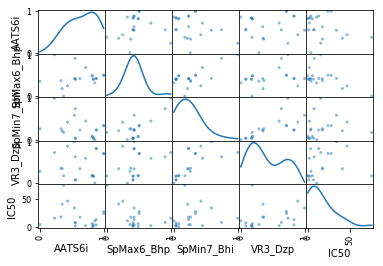

In [23]:
mymodel.model_corr()

In [24]:
mymodel.mlr()

Model features:  ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']
Coefficients:  [[  39.77292136 -149.69128095  148.56191871  -39.91760017]]
Intercept:  [35.99488345]
RMSE: 4.864693
R^2: 0.930471


C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\export_model.py:97: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.X_data.loc[:,self.feature_set].as_matrix()
C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\export_model.py:98: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = self.y_data.as_matrix()


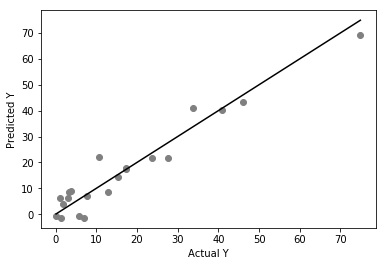

In [26]:
mymodel.train_plot()

C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\cross_validation.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = X_data.loc[:,feature_set].as_matrix()
C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\cross_validation.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y =y_data.as_matrix()


R^2CV mean: 0.931113
Q^2CV mean: 0.830489
RMSE CV : 6.19646
Features set = ['AATS6i', 'SpMax6_Bhp', 'SpMin7_Bhi', 'VR3_Dzp']
Model coeff =  [[  39.40732317 -148.89458886  146.8241821   -38.49411674]]
Model intercept =  [35.74311833]


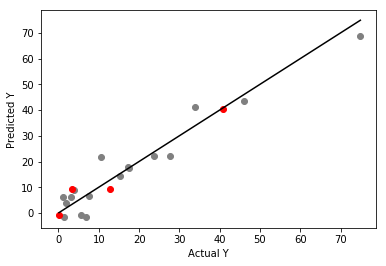

In [27]:
from pyqsar import cross_validation as cv
cv.k_fold(X_data, y_data, feature_set, k=5, run=100)